# ACF and PACF with Stock Returns

While auto arima seems like the best path to take, we saw earlier that the auto arima models did not do better than the naive forecasts.  So can we use the "old school" methods with ACF and PACF to do better?

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
# use the same dataset we added for the auto arima work on stocks
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [3]:
# start again with Google
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [4]:
def log_ret(price):
    log_price = np.log(price)
    return log_price.diff()

In [5]:
goog['LogRet'] = log_ret(goog['Close'])

In [6]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


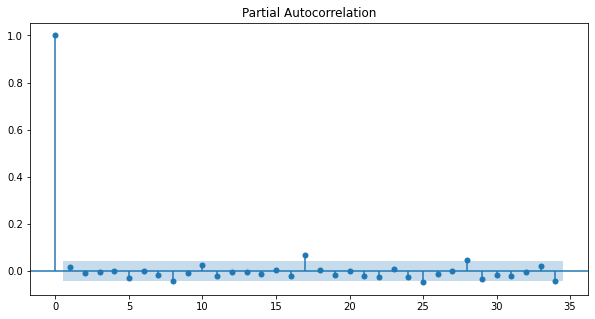

In [7]:
# plot PACF
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(goog['LogRet'].dropna(), ax=ax);

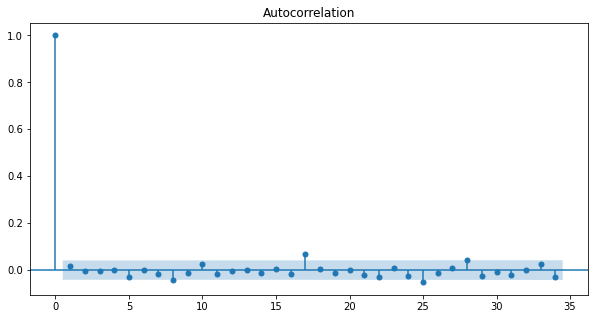

In [8]:
# plot ACF
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(goog['LogRet'].dropna(), ax=ax);

It appears that both p and q would be zero. This would be a random walk.

In [9]:
# do this for Apple
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()
aapl['LogRet'] = log_ret(aapl['Close'])

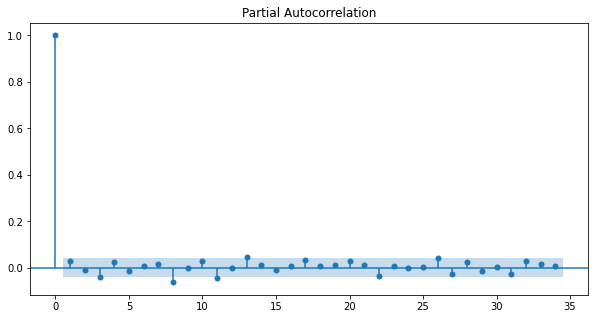

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(aapl['LogRet'].dropna(), ax=ax);

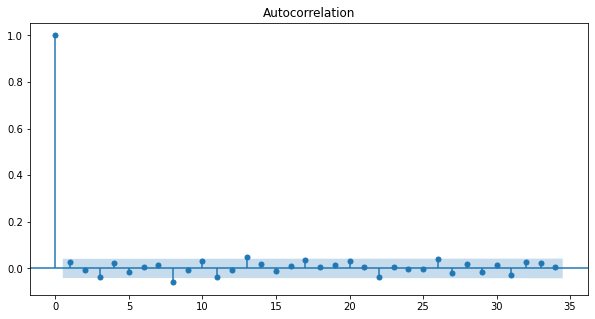

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(aapl['LogRet'].dropna(), ax=ax);

Again, p and q would be zero, and this looks like a random walk.

In [12]:
# any difference with IBM?
ibm = df[df['Name'] == 'IBM'][['Close']].copy()
ibm['LogRet'] = log_ret(ibm['Close'])

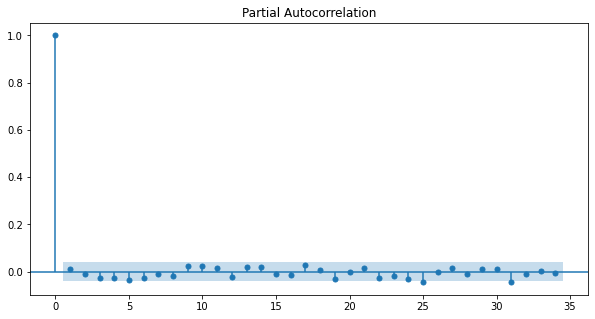

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(ibm['LogRet'].dropna(), ax=ax);

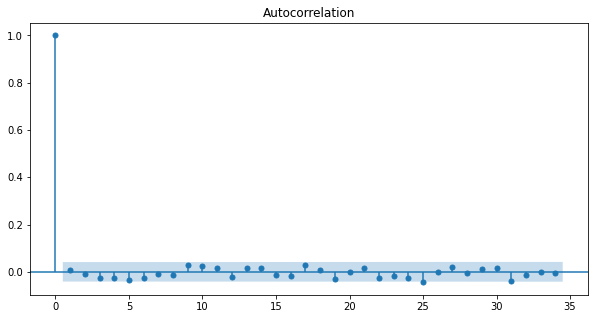

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(ibm['LogRet'].dropna(), ax=ax);

All of these stock series appear to be random walks.